In [ ]:
pip install tabulate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [ ]:
df = pd.read_csv('/content/ClarificationTask_DevData_Oct22a.tsv', delimiter='\t')

# Display the first few rows of the dataframe

In [ ]:
df.head()

,Id,Resolved pattern,Article title,Section header,Previous context,Sentence,Follow-up context,Filler1,Filler2,Filler3,Filler4,Filler5
0,0,IMPLICIT REFERENCE,How to Detect Cleft Lip Early in Pregnancy,Treating Cleft Lip,1. Care for a newborn with a cleft lip. (....,2. Get surgery for ______ at 3 to 6 months old.,A pediatric surgeon will move the skin and mus...,the split,your chin,cleft lips,your baby,the ear
1,1,METONYMIC REFERENCE,How to Deal With Being Single and Feeling Lonely,Focusing on Yourself,(...) 3. Go on a trip. (...) 4. Get active an...,"If you are lonely, take up a new sport or ____...","This is great for your body, as well as your s...",freedom,circle,field,activity,form
2,2,FUSED HEAD,How to Cope With Anxiety and Depression,Seeking Professional Help,(...) 4. Allow medication time to work. If yo...,Most ______ take four to eight weeks to show a...,NaN,disorders,men,medications,people,procedures
3,3,FUSED HEAD,How to Be an Otaku (Anime Geek),Steps,1. Pick and watch some anime of your interest...,"If you want to have the edge over others, then...",2. Try watchingthe anime in the original Japan...,families,humans,men,people,females
4,4,METONYMIC REFERENCE,How to Uninstall Netflix on Samsung Smart TV,Steps,1. Press the Home button.,The home button is the button that resembles t...,This will open the Smart Hub.,video,interior,outline,movement,construction


# Checking for missing values

In [ ]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Id                    0
Resolved pattern      0
Article title         0
Section header        0
Previous context      0
Sentence              0
Follow-up context    39
Filler1               0
Filler2               0
Filler3               0
Filler4               0
Filler5               0
dtype: int64


# Remove rows with missing values

In [ ]:

df_cleaned = df.dropna()

In [ ]:
# Verify that there are no missing values
missing_values_after_cleaning = df_cleaned.isnull().sum()
print("\nMissing values after cleaning:")
print(missing_values_after_cleaning)


Missing values after cleaning:
Id                   0
Resolved pattern     0
Article title        0
Section header       0
Previous context     0
Sentence             0
Follow-up context    0
Filler1              0
Filler2              0
Filler3              0
Filler4              0
Filler5              0
dtype: int64



# Display the first few rows of the cleaned datafram

In [ ]:
df_cleaned.head()

,Id,Resolved pattern,Article title,Section header,Previous context,Sentence,Follow-up context,Filler1,Filler2,Filler3,Filler4,Filler5
0,0,IMPLICIT REFERENCE,How to Detect Cleft Lip Early in Pregnancy,Treating Cleft Lip,1. Care for a newborn with a cleft lip. (....,2. Get surgery for ______ at 3 to 6 months old.,A pediatric surgeon will move the skin and mus...,the split,your chin,cleft lips,your baby,the ear
1,1,METONYMIC REFERENCE,How to Deal With Being Single and Feeling Lonely,Focusing on Yourself,(...) 3. Go on a trip. (...) 4. Get active an...,"If you are lonely, take up a new sport or ____...","This is great for your body, as well as your s...",freedom,circle,field,activity,form
3,3,FUSED HEAD,How to Be an Otaku (Anime Geek),Steps,1. Pick and watch some anime of your interest...,"If you want to have the edge over others, then...",2. Try watchingthe anime in the original Japan...,families,humans,men,people,females
4,4,METONYMIC REFERENCE,How to Uninstall Netflix on Samsung Smart TV,Steps,1. Press the Home button.,The home button is the button that resembles t...,This will open the Smart Hub.,video,interior,outline,movement,construction
5,5,METONYMIC REFERENCE,How to Draw a Human Figure from the Side,Steps,1.,Use a pencil to draw the ______ of a half circ...,This circle should be higher on the page as it...,section,top,walls,corners,points


In [ ]:
# Descriptive statistics for numerical columns
numerical_stats = df_cleaned.describe()

# Descriptive statistics for Numerical and categorical columns


In [ ]:
categorical_stats = df_cleaned.describe(include=[object])

print("Numerical columns descriptive statistics:")
print(numerical_stats)


Numerical columns descriptive statistics:
               Id
count  461.000000
mean   251.108460
std    144.181548
min      0.000000
25%    128.000000
50%    253.000000
75%    375.000000
max    499.000000


In [ ]:
print("\nCategorical columns descriptive statistics:")
print(categorical_stats)


Categorical columns descriptive statistics:
          Resolved pattern                    Article title Section header  \
count                  461                              461            461   
unique                   4                              431            233   
top     IMPLICIT REFERENCE  How to Fix Sticky Keyboard Keys          Steps   
freq                   124                                3            126   

       Previous context                          Sentence Follow-up context  \
count               461                               461               461   
unique              403                               457               452   
top                      3. Pull the tape across ______.                      
freq                 34                                 2                 7   

        Filler1 Filler2  Filler3  Filler4 Filler5  
count       461     461      461      461     461  
unique      400     404      416      403     405  
top     sect

# Bar chart for 'Resolved pattern'

<ipython-input-23-d0502f99d820>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_cleaned, x='Resolved pattern', palette=colors)


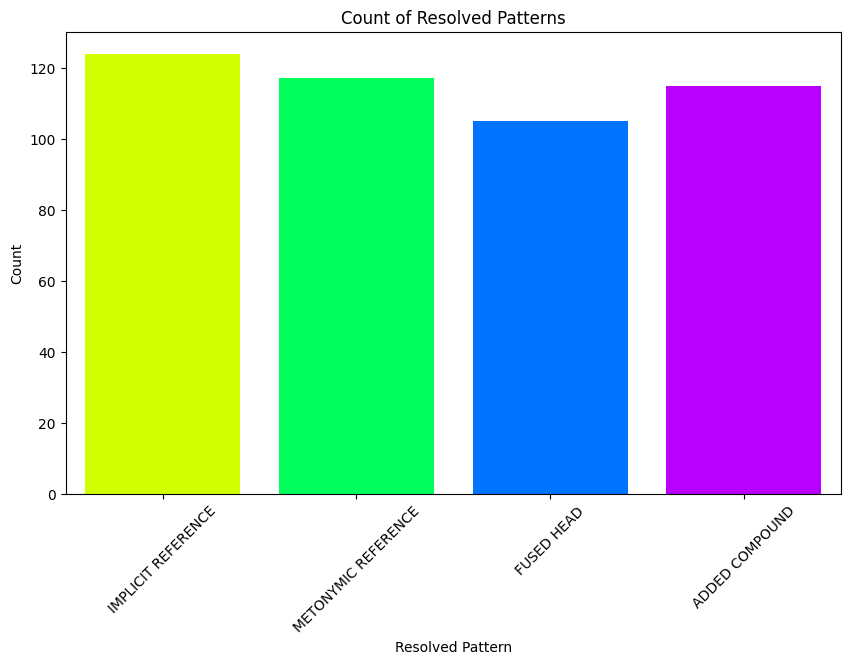

In [ ]:
colors = sns.color_palette("hsv", len(df_cleaned['Resolved pattern'].unique()))
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_cleaned, x='Resolved pattern', palette=colors)
plt.title('Count of Resolved Patterns')
plt.xlabel('Resolved Pattern')
plt.ylabel('Count')
plt.xticks(rotation=45)
for patch, color in zip(ax.patches, colors):
    patch.set_facecolor(color)

plt.show()

# Histogram for the length of 'Sentence'


<ipython-input-24-5edfd08cada0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sentence Length'] = df_cleaned['Sentence'].apply(len)


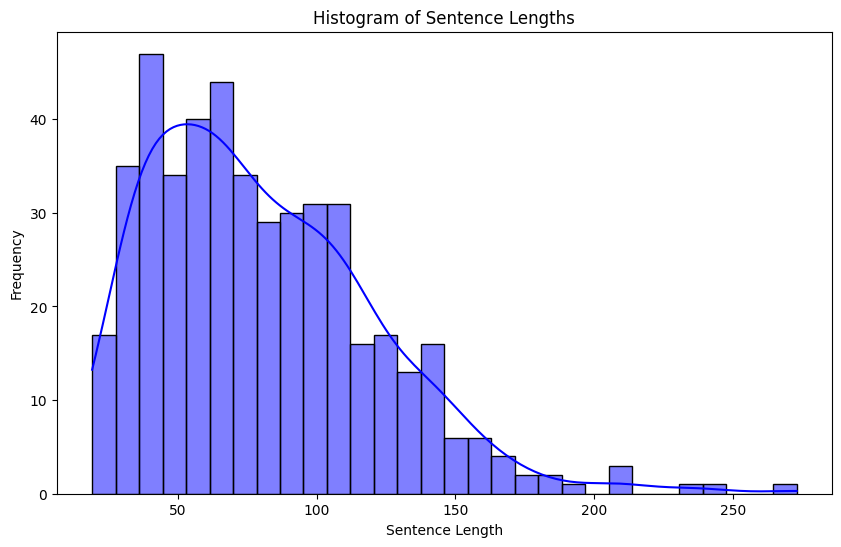

In [ ]:

df_cleaned['Sentence Length'] = df_cleaned['Sentence'].apply(len)

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Sentence Length'], bins=30, kde=True, color='blue')
plt.title('Histogram of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

# Pie chart for 'Resolved pattern'

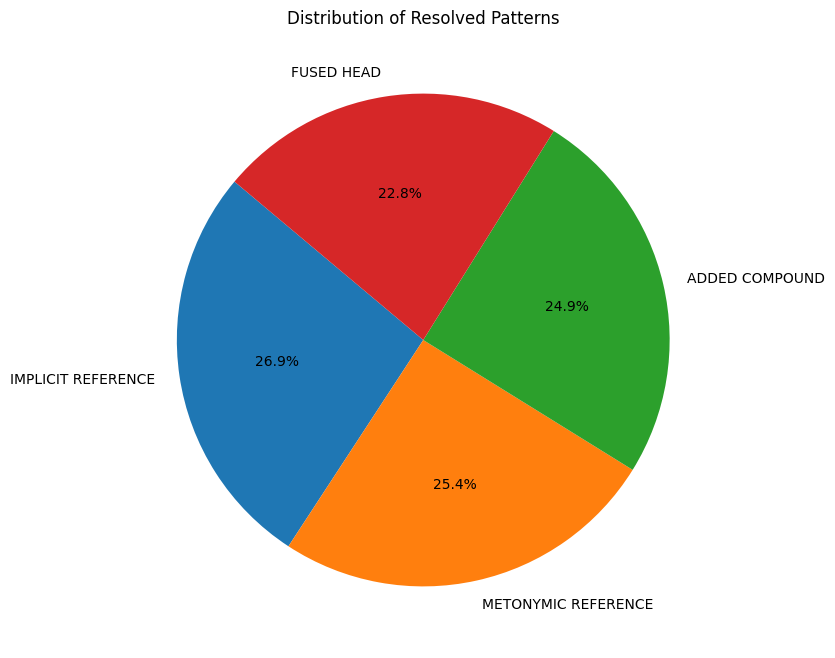

In [ ]:
resolved_pattern_counts = df_cleaned['Resolved pattern'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(resolved_pattern_counts, labels=resolved_pattern_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Resolved Patterns')
plt.show()

In [ ]:
df_cleaned.head()

,Id,Resolved pattern,Article title,Section header,Previous context,Sentence,Follow-up context,Filler1,Filler2,Filler3,Filler4,Filler5,Sentence Length
0,0,2,How to Detect Cleft Lip Early in Pregnancy,Treating Cleft Lip,1. Care for a newborn with a cleft lip. (....,2. Get surgery for ______ at 3 to 6 months old.,A pediatric surgeon will move the skin and mus...,the split,your chin,cleft lips,your baby,the ear,48
1,1,3,How to Deal With Being Single and Feeling Lonely,Focusing on Yourself,(...) 3. Go on a trip. (...) 4. Get active an...,"If you are lonely, take up a new sport or ____...","This is great for your body, as well as your s...",freedom,circle,field,activity,form,62
3,3,1,How to Be an Otaku (Anime Geek),Steps,1. Pick and watch some anime of your interest...,"If you want to have the edge over others, then...",2. Try watchingthe anime in the original Japan...,families,humans,men,people,females,212
4,4,3,How to Uninstall Netflix on Samsung Smart TV,Steps,1. Press the Home button.,The home button is the button that resembles t...,This will open the Smart Hub.,video,interior,outline,movement,construction,83
5,5,3,How to Draw a Human Figure from the Side,Steps,1.,Use a pencil to draw the ______ of a half circ...,This circle should be higher on the page as it...,section,top,walls,corners,points,50


# Evaluating Deep Learning Model of LSTM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_cleaned['Sentence'])
sequences = tokenizer.texts_to_sequences(df_cleaned['Sentence'])
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Step 2: Prepare target variable
labels = df_cleaned['Resolved pattern'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=256, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
model.add(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(units=len(df_cleaned['Resolved pattern'].unique()), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy of LSTM: {accuracy}')


Epoch 1/50
6/6 [==============================] - 75s 869ms/step - loss: 1.3911 - accuracy: 0.2636 - val_loss: 1.3848 - val_accuracy: 0.2688
Epoch 2/50
6/6 [==============================] - 7s 1s/step - loss: 1.3860 - accuracy: 0.2636 - val_loss: 1.3856 - val_accuracy: 0.2688
Epoch 3/50
6/6 [==============================] - 8s 1s/step - loss: 1.3868 - accuracy: 0.2609 - val_loss: 1.3850 - val_accuracy: 0.2688
Epoch 4/50
6/6 [==============================] - 4s 706ms/step - loss: 1.3871 - accuracy: 0.2690 - val_loss: 1.3839 - val_accuracy: 0.2688
Epoch 5/50
6/6 [==============================] - 6s 1s/step - loss: 1.3845 - accuracy: 0.2717 - val_loss: 1.3846 - val_accuracy: 0.2688
Epoch 6/50
6/6 [==============================] - 4s 683ms/step - loss: 1.3845 - accuracy: 0.2717 - val_loss: 1.3846 - val_accuracy: 0.2688
Epoch 7/50
6/6 [==============================] - 4s 707ms/step - loss: 1.3836 - accuracy: 0.2772 - val_loss: 1.3806 - val_accuracy: 0.2688
Epoch 8/50
6/6 [============

# Evaluating Deep Learning Model of CNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_cleaned['Sentence'])
sequences = tokenizer.texts_to_sequences(df_cleaned['Sentence'])
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

labels = df_cleaned['Resolved pattern'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(filters=256, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=len(df_cleaned['Resolved pattern'].unique()), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy of CNN: {accuracy}')


Epoch 1/20
6/6 [==============================] - 3s 154ms/step - loss: 1.3893 - accuracy: 0.2310 - val_loss: 1.3855 - val_accuracy: 0.2796
Epoch 2/20
6/6 [==============================] - 1s 107ms/step - loss: 1.3856 - accuracy: 0.2690 - val_loss: 1.3852 - val_accuracy: 0.3333
Epoch 3/20
6/6 [==============================] - 1s 111ms/step - loss: 1.3794 - accuracy: 0.2880 - val_loss: 1.3827 - val_accuracy: 0.3011
Epoch 4/20
6/6 [==============================] - 1s 110ms/step - loss: 1.3678 - accuracy: 0.3370 - val_loss: 1.3800 - val_accuracy: 0.3548
Epoch 5/20
6/6 [==============================] - 1s 115ms/step - loss: 1.3374 - accuracy: 0.4647 - val_loss: 1.3693 - val_accuracy: 0.3441
Epoch 6/20
6/6 [==============================] - 1s 114ms/step - loss: 1.2829 - accuracy: 0.4918 - val_loss: 1.3348 - val_accuracy: 0.4086
Epoch 7/20
6/6 [==============================] - 1s 110ms/step - loss: 1.1519 - accuracy: 0.5924 - val_loss: 1.2578 - val_accuracy: 0.4516
Epoch 8/20
6/6 [====